## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
Working in a chain of bicycle stores. A new team leader comes from a different industry and wants A help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data 

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

# Importing packages

In [1]:
# importing packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

- note:
you need to install the package (ipython-sql) by the command (!pip install ipython-sql)

# Connecting to the Database

In [2]:
#create connection
cnn= sqlite3.connect("bicycle_market.db")

In [3]:
#load the sql module to ipython
%load_ext sql

In [4]:
%sql sqlite:///bicycle_market.db

- Now we can run SQL queries using the magic tool %sql

# Exploring Data

In [135]:
%%sql
SELECT * 
FROM Products
limit 10;

 * sqlite:///bicycle_market.db
Done.


product_id,product_name,brand_id,category_id,model_year,list_price
1,Trek 820 - 2016,9,6,2016,379.99
2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
6,Surly Ice Cream Truck Frameset - 2016,8,6,2016,469.99
7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
9,Trek Conduit+ - 2016,9,5,2016,2999.99
10,Surly Straggler - 2016,8,4,2016,1549


In [6]:
%%sql
SELECT * FROM brands;

 * sqlite:///bicycle_market.db
Done.


brand_id,brand_name
1,Electra
2,Haro
3,Heller
4,Pure Cycles
5,Ritchey
6,Strider
7,Sun Bicycles
8,Surly
9,Trek


In [7]:
%%sql
SELECT * FROM categories

 * sqlite:///bicycle_market.db
Done.


category_id,category_name
1,Children Bicycles
2,Comfort Bicycles
3,Cruisers Bicycles
4,Cyclocross Bicycles
5,Electric Bikes
6,Mountain Bikes
7,Road Bikes


In [136]:
%%sql
select * from stocks
limit 10;

 * sqlite:///bicycle_market.db
Done.


store_id,product_id,quantity
1,1,27
1,2,5
1,3,6
1,4,23
1,5,22
1,6,0
1,7,8
1,8,0
1,9,11
1,10,15


# Answering questions

# What is the most expensive item your company sells? The least expensive?

- The most expensive product is :

In [9]:
%%sql
select product_name, model_year, category_name, brand_name, list_price
from products as p
left join categories as c
on p.category_id = c.category_id
left join brands as b
on p.brand_id = b.brand_id
where list_price = (select max(list_price) from products);


 * sqlite:///bicycle_market.db
Done.


product_name,model_year,category_name,brand_name,list_price
Trek Domane SLR 9 Disc - 2018,2018,Road Bikes,Trek,11999.99


- The least expensive product is :

In [10]:
%%sql
select product_name ,model_year ,category_name, brand_name, list_price 
from products as p
left join categories as c
on p.category_id = c.category_id
left join brands as b
on p.brand_id = b.brand_id
where list_price = (select min(list_price) from products);

 * sqlite:///bicycle_market.db
Done.


product_name,model_year,category_name,brand_name,list_price
Strider Classic 12 Balance Bike - 2018,2018,Children Bicycles,Strider,89.99


 comment:
 * The most expensive product is Trek Domane SLR 9 Disc - 2018 with price 11999.99
 * The least expensive product is Strider Classic 12 Balance Bike - 2018 with price 89.99

# How many different products of each category does your company sell?

In [11]:
%%sql
select c.category_name, count(Product_name) as Number_of_products
from products as p
left join categories as c
on p.category_id = c.category_id
group by c.category_name
order by Number_of_products desc;

 * sqlite:///bicycle_market.db
Done.


category_name,Number_of_products
Cruisers Bicycles,78
Road Bikes,60
Mountain Bikes,60
Children Bicycles,59
Comfort Bicycles,30
Electric Bikes,24
Cyclocross Bicycles,10


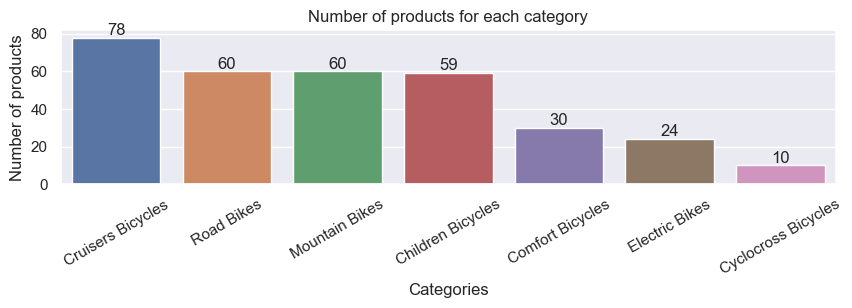

In [69]:
df= pd.read_sql("select c.category_name, count(Product_name) as Number_of_products from products as p left join categories as c on p.category_id = c.category_id group by c.category_name order by Number_of_products desc;", con = cnn)                
sns.barplot(x="category_name", y= "Number_of_products", data= df)
sns.set(rc={'figure.figsize':(10,1)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Number of products for each category")
plt.xlabel("Categories")
plt.ylabel("Number of products")
plt.xticks(rotation=30)
plt.show()


# What are the top three brands with the highest average list price? The top three categories?

In [18]:
%%sql
select brand_name as top_3_brand_name , round(avg(list_price),2) as average_prices
from products as p
left join brands as b
on p.brand_id = b.brand_id
group by brand_name
order by avg(list_price) desc
limit 3;

 * sqlite:///bicycle_market.db
Done.


top_3_brand_name,average_prices
Trek,2500.06
Heller,2173.0
Surly,1331.75


In [ ]:
# This is a chart, switch to the DataCamp editor to view and configure it.

In [21]:
%%sql
select category_name , round(avg(list_price),2) as average_price
from products as p
left join categories as c
on p.category_id = c.category_id
group by category_name
order by avg(list_price) desc
limit 3;

 * sqlite:///bicycle_market.db
Done.


category_name,average_price
Electric Bikes,3281.66
Road Bikes,3175.36
Cyclocross Bicycles,2542.79


# Extra insights

# describe the distribution of prices?

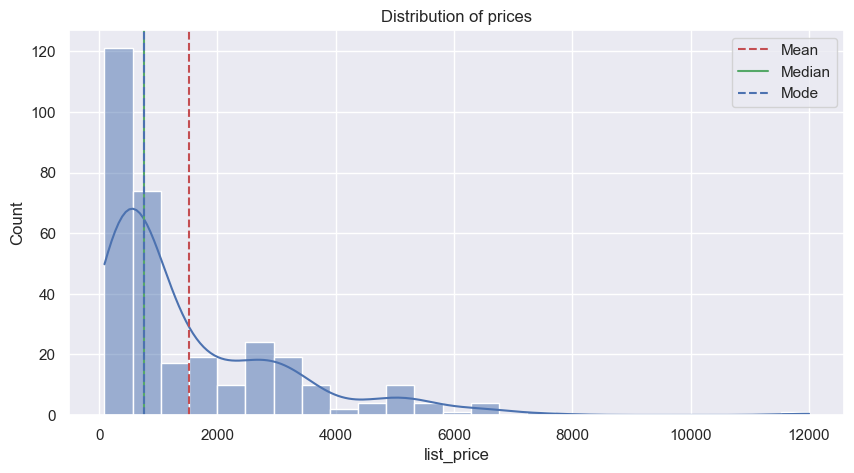

In [117]:
df1= pd.read_sql("select * from products",con= cnn)
mean=df1['list_price'].mean()
median=df1['list_price'].median()
mode=df1['list_price'].mode().values[0]
sns.histplot(data= df1, x="list_price", kde= True, bins= 25)
sns.set(rc={'figure.figsize':(10,5)})
ax = plt.gca()
ax.axvline(mean, color='r', linestyle='--', label= "Mean")
ax.axvline(median, color='g', linestyle='-',label= "Median")
ax.axvline(mode, color='b', linestyle='--',label= "Mode")
plt.title("Distribution of prices")
plt.legend()
plt.show()

In [112]:
print("The mean of prices is {}".format(round(mean,2)))
print("The median of prices is {}".format(median))
print("The mode of prices is {}".format(mode))

The mean of prices is 1520.59
The median of prices is 761.99
The mode of prices is 749.99


# Clasifiy products by Category name ? and what is the most expensive Price , least expensive price?

In [22]:
%%sql
select category_name, count(product_name) as quantity_of_products, max(list_price) as maxiumum_price, min(list_price) as minumum_price
from products as p
left join categories as c
on p.category_id = c.category_id
group by category_name
order by minumum_price, maxiumum_price;

 * sqlite:///bicycle_market.db
Done.


category_name,quantity_of_products,maxiumum_price,minumum_price
Children Bicycles,59,489.99,89.99
Cruisers Bicycles,78,2999.99,250.99
Mountain Bikes,60,5299.99,379.99
Comfort Bicycles,30,2599.99,416.99
Road Bikes,60,11999.99,749.99
Cyclocross Bicycles,10,3999.99,1549
Electric Bikes,24,4999.99,1559.99


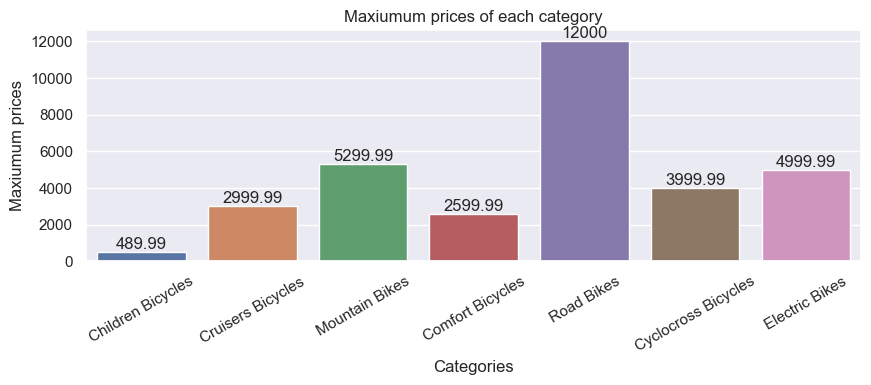

In [66]:
df2= pd.read_sql("select category_name, count(product_name) as quantity_of_products, max(list_price) as maxiumum_price, min(list_price) as minumum_price from products as p left join categories as c on p.category_id = c.category_id group by category_name order by minumum_price, maxiumum_price;", con= cnn)
sns.barplot(x="category_name", y= "maxiumum_price", data= df2)
sns.set(rc={'figure.figsize':(10,3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Maxiumum prices of each category")
plt.xlabel("Categories")
plt.ylabel("Maxiumum prices")
plt.xticks(rotation=30)
plt.show()

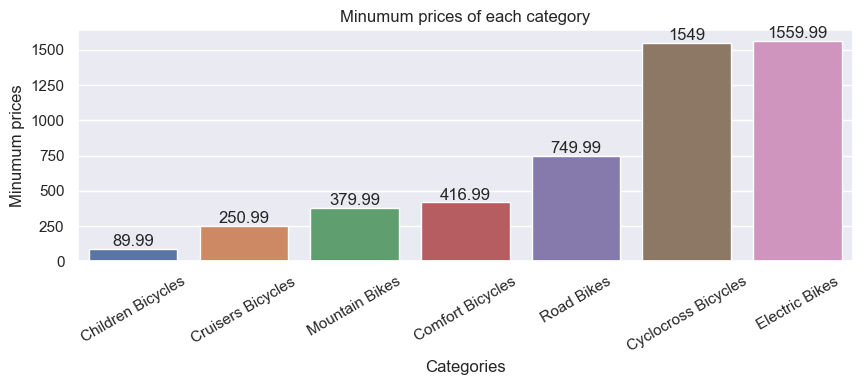

In [65]:
sns.barplot(x="category_name", y= "minumum_price", data= df2)
sns.set(rc={'figure.figsize':(10,3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Minumum prices of each category")
plt.xlabel("Categories")
plt.ylabel("Minumum prices")
plt.xticks(rotation=30)
plt.show()

# Classify products by brands and what is the minumum and maxiumum prices?

In [52]:
%%sql
select brand_name, count(product_name) as quantity_of_products, max(list_price) as maxiumum_price, min(list_price) as minumum_price
from products as p
left join brands as b
on p.brand_id = b.brand_id
group by brand_name
order by minumum_price, maxiumum_price;

 * sqlite:///bicycle_market.db
Done.


brand_name,quantity_of_products,maxiumum_price,minumum_price
Strider,3,289.99,89.99
Sun Bicycles,23,1559.99,109.99
Trek,135,11999.99,149.99
Haro,10,1469.99,209.99
Electra,118,2999.99,269.99
Pure Cycles,3,449,429
Surly,25,2499.99,469.99
Ritchey,1,749.99,749.99
Heller,3,2599,1320.99


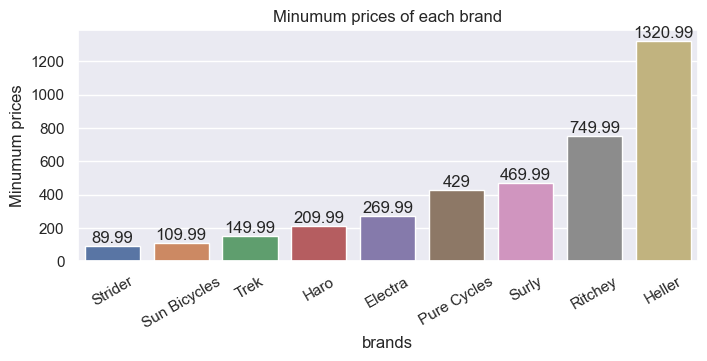

In [64]:
df3= pd.read_sql("select brand_name, count(product_name) as quantity_of_products, max(list_price) as maxiumum_price, min(list_price) as minumum_price from products as p left join brands as b on p.brand_id = b.brand_id group by brand_name order by minumum_price, maxiumum_price;",con= cnn)
sns.barplot(x="brand_name", y= "minumum_price", data= df3)
sns.set(rc={'figure.figsize':(10,3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Minumum prices of each brand")
plt.xlabel("brands")
plt.ylabel("Minumum prices")
plt.xticks(rotation=30)
plt.show()

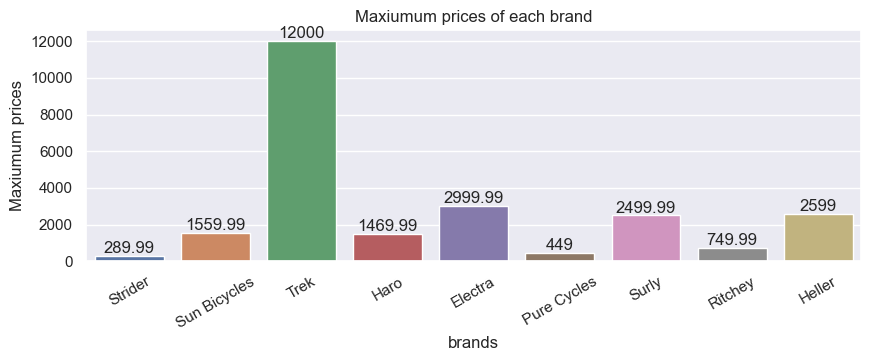

In [121]:
sns.barplot(x="brand_name", y= "maxiumum_price", data= df3)
sns.set(rc={'figure.figsize':(10,3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Maxiumum prices of each brand")
plt.xlabel("brands")
plt.ylabel("Maxiumum prices")
plt.xticks(rotation=30)
plt.show()

# How many products in each Brand?

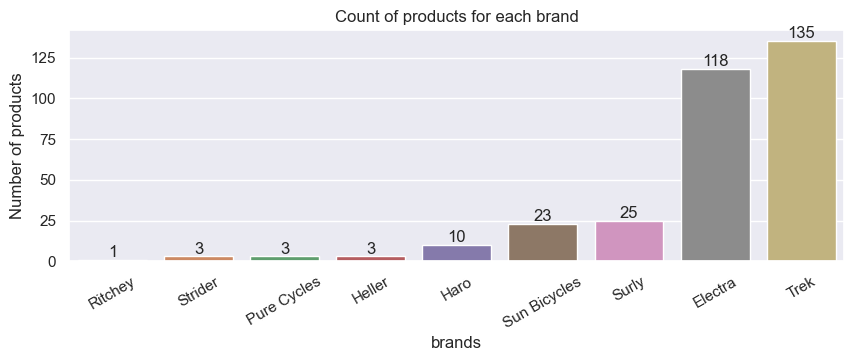

In [125]:
sns.barplot(x="brand_name", y= "quantity_of_products", data= df3.sort_values("quantity_of_products"))
sns.set(rc={'figure.figsize':(10,3)})
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_title("Count of products for each brand")
plt.xlabel("brands")
plt.ylabel("Number of products")
plt.xticks(rotation=30)
plt.show()

# List products that runs out from the Stock?

In [130]:
%%sql
select Store.product_name, Store.model_year, Store.brand_name, Store.category_name , Store.list_price, Store.quantity_in_store
from (select product_name, sum(s.quantity) as quantity_in_store, model_year,brand_name,category_name,list_price
      from products as p 
      left join stocks as s on p.product_id = s.product_id
      left join brands as b on p.brand_id= b.brand_id
      left join categories as c on c.category_id= p.category_id
group by p.product_name, model_year, brand_name, category_name, list_price) as Store
where quantity_in_store is null;

 * sqlite:///bicycle_market.db
Done.


product_name,model_year,brand_name,category_name,list_price,quantity_in_store
Electra Townie Original 21D EQ Ladies' - 2018,2018,Electra,Comfort Bicycles,679.99,None
Electra Townie Original 21D Ladies' - 2018,2018,Electra,Comfort Bicycles,559.99,None
Trek Checkpoint ALR 4 Women's - 2019,2019,Trek,Road Bikes,1699.99,None
Trek Checkpoint ALR 5 - 2019,2019,Trek,Road Bikes,1999.99,None
Trek Checkpoint ALR 5 Women's - 2019,2019,Trek,Road Bikes,1999.99,None
Trek Checkpoint ALR Frameset - 2019,2019,Trek,Road Bikes,3199.99,None
Trek Checkpoint SL 5 Women's - 2019,2019,Trek,Road Bikes,2799.99,None
Trek Checkpoint SL 6 - 2019,2019,Trek,Road Bikes,3799.99,None


# create market list of products which its quantity in store is less than 20?

In [134]:
%%sql
select Store.product_name, Store.model_year, Store.brand_name, Store.category_name , Store.list_price, quantity_in_store, 20- quantity_in_store as quantity_to_buy
from (select product_name,brand_name,category_name,model_year,list_price, sum(case when quantity is null then '0' else quantity  end) as quantity_in_store 
       from products as p 
      left join stocks as s on p.product_id = s.product_id
      left join brands as b on p.brand_id= b.brand_id
      left join categories as c on c.category_id= p.category_id
group by product_name, model_year, brand_name, category_name, list_price) as Store
where (quantity_in_store < 20)
order by quantity_in_store;

 * sqlite:///bicycle_market.db
Done.


product_name,model_year,brand_name,category_name,list_price,quantity_in_store,quantity_to_buy
Electra Townie Original 21D EQ Ladies' - 2018,2018,Electra,Comfort Bicycles,679.99,0,20
Electra Townie Original 21D Ladies' - 2018,2018,Electra,Comfort Bicycles,559.99,0,20
Trek Checkpoint ALR 4 Women's - 2019,2019,Trek,Road Bikes,1699.99,0,20
Trek Checkpoint ALR 5 - 2019,2019,Trek,Road Bikes,1999.99,0,20
Trek Checkpoint ALR 5 Women's - 2019,2019,Trek,Road Bikes,1999.99,0,20
Trek Checkpoint ALR Frameset - 2019,2019,Trek,Road Bikes,3199.99,0,20
Trek Checkpoint SL 5 Women's - 2019,2019,Trek,Road Bikes,2799.99,0,20
Trek Checkpoint SL 6 - 2019,2019,Trek,Road Bikes,3799.99,0,20
Trek Domane SLR Frameset - 2018,2018,Trek,Road Bikes,3199.99,5,15
"Electra Superbolt 1 20\ - 2018""",2018,Electra,Children Bicycles,319.99,9,11


## Good luck!